# Análise Preditiva das Ações

O objetivo deste projeto é fazer uma análise preditiva de uma determinada ação utilizando a biblioteca Yahoo Finance e o Prophet do Facebook 

In [ ]:
!pip install yfinance prophet

In [13]:
!pip install "numpy>=1.16.5,<1.23.0"

In [2]:
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

In [3]:
acao = input('Digite a ação desejada: ')
dados = yf.Ticker(acao).history('2y')

Digite a ação desejada: LREN3.SA


<AxesSubplot:xlabel='Date'>

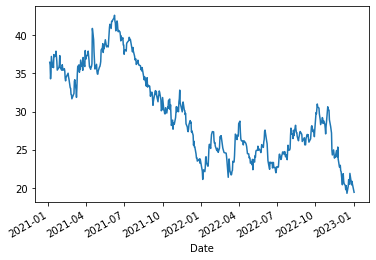

In [4]:
dados.Close.plot()

## Dados de Treinamento

In [5]:
treinamento = dados.reset_index()

In [6]:
treinamento['Date'] = treinamento['Date'].dt.tz_localize(None)

In [7]:
treinamento = treinamento[["Date", "Close"]]

In [8]:
treinamento.columns = ['ds','y']

## Treinando o modelo

In [14]:
# criando o modelo
modelo = Prophet()

# treinando o modelo com os dados de treinamento
modelo.fit(treinamento)

# especificando o período das previsões (em dias)
periodo = modelo.make_future_dataframe(periods=90)

# gerando as previsões
previsoes = modelo.predict(periodo)

16:55:00 - cmdstanpy - INFO - Chain [1] start processing
16:55:01 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
plot_plotly(modelo, previsoes, xlabel = "período", ylabel="valor")

Projeto realizado através das aulas da Empowerdata na Semana do Python na Prática.